<a href="https://colab.research.google.com/github/Mekhala12/Machine-Learning/blob/master/Final_zom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***SENTIMENT ANALYSIS AND RECOMMENDATION SYSTEM ON ZOMATO DATASET***

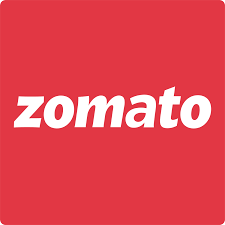






***`  Step 1`***: We have to load the dataset into google colab for further processing, Here I am using the Zomato Bangalore dataset from kaggle and loading it on colab using an API call, Below code allows us to extract and load the dataset from kaggle.








In [14]:
#install kaggle
!pip install -q kaggle

In [15]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"mekhalavpurohit","key":"f0814502f1d3bb588ae536ae940ba0d8"}'}

In [16]:
#create a kaggle folder
! mkdir ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [17]:
#copy the kaggle.json file to folder created
! cp kaggle.json ~/.kaggle/

In [18]:
#Permission for the json file to act in the colab
! chmod 600 ~/.kaggle/kaggle.json

In [19]:
#To list all the datasets available in the kaggle(Just to know the already available datasets on colab for public use)
#We can see that zomato dataset is not available, Hence we have to load from kaggle.
! kaggle datasets list

ref                                                                title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                              Data Science Salaries 2023 💸                       25KB  2023-04-13 09:55:16          10330        278  1.0              
asahu40/walmart-data-analysis-and-forcasting                       Walmart Data Analysis and Forcasting              122KB  2023-04-26 07:07:03           1406         33  1.0              
ahmedshahriarsakib/usa-real-estate-dataset                         USA Real Estate Dataset                             1MB  2023-04-30 03:51:36           1152         32  1.0              
iammustafatz/diabetes-prediction-dataset               

In [20]:
!pwd


/content


In [21]:
#This below code is the API copied from the Kaggle, This will allow us to download the dataset here
!kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants

zomato-bangalore-restaurants.zip: Skipping, found more recently modified local copy (use --force to force download)


In [22]:
#Extracting the file(Unzipping process)
!unzip zomato-bangalore-restaurants

Archive:  zomato-bangalore-restaurants.zip
replace zomato.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 


----------------------------------------------------
This ends the dataset extraction from kaggle to the google colab.


In [23]:
 #importing all the necessary libraries
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from textblob import TextBlob
from nltk.corpus import opinion_lexicon
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
#Installing the LIME tool(Explainable AI tools) to implement the model
!pip install lime


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import lime

*`Step 2`*: The below code is cleaning the data and predicting the ratings.



In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


# Load the dataset
df = pd.read_csv('zomato.csv')

# Remove null values
df.dropna(inplace=True)

# Convert the text to lowercase
df['reviews_list'] = df['reviews_list'].str.lower()

# Remove punctuation and digits from the text
df['reviews_list'] = df['reviews_list'].str.replace('[^\w\s]', '')
df['reviews_list'] = df['reviews_list'].str.replace('\d+', '')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['reviews_list'], df['rate'], test_size=0.2, random_state=42)

# Vectorize the text using CountVectorizer
cv = CountVectorizer(stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# Train the model using Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_cv, y_train)

# Test the model and calculate accuracy
y_pred = nb.predict(X_test_cv)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100)

y_true = y_test

# Assuming y_true is the array containing the actual ratings
# Create a new DataFrame with the predicted and actual ratings
results = pd.DataFrame({'predicted_rating': y_pred, 'actual_rating': y_true})

# Write the DataFrame to a CSV file
results.to_csv('zomato_test_results.csv', index=False)

# Print the DataFrame
print(results)






Accuracy: 42.25048501832291
      predicted_rating actual_rating
9707            3.4 /5         3.3/5
34728           4.5 /5        4.5 /5
51182           3.9 /5        3.2 /5
41270           4.3 /5        3.9 /5
31348            3.9/5        4.0 /5
...                ...           ...
15443           4.0 /5         3.7/5
3021             3.8/5         3.8/5
40333           4.6 /5        4.6 /5
19059            3.9/5         3.9/5
29271           4.9 /5        4.9 /5

[4639 rows x 2 columns]


*`The above code uses Naive bayes text classification model to predict the ratings and it is creating a file with predicted and actual ratings in it for comparison.`*



*`Step 3`*: I am using the tool called LIME. It is an XAI tool which explains us why the predicted values were of that value, meaning - it will give us the reasons/factors that are affecting for the model to give that rating as a predicted rating.

In [27]:
import pandas as pd
import lime
import lime.lime_text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('zomato.csv')

# Replace NaN values with an empty string
df = df.fillna('')

# Clean the data
df['reviews_list'] = df['reviews_list'].str.lower().str.replace('[^\w\s]', '').str.replace('\d+', '')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['reviews_list'], df['rate'], test_size=0.2, random_state=42)

# Create a pipeline for the machine learning model with the best hyperparameters
pipeline = make_pipeline(TfidfVectorizer(ngram_range=(1, 2), max_df=0.5, min_df=1),
                         MultinomialNB(alpha=0.1))

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Create the explainer object
explainer = lime.lime_text.LimeTextExplainer(class_names=['negative', 'neutral', 'positive'])

# Define a function to print the predicted and actual values for each review
def predict_and_print(review):
    print(f"Review: {review}")
    exp = explainer.explain_instance(review, pipeline.predict_proba, num_features=10)
    print(f"Factors affecting the prediction: {exp.as_list()}")
    print(f"Predicted value: {pipeline.predict([review])[0]}")
    print(f"Actual value: {y_test.values[0]}\n")

# Select 10 reviews from the test set
sample_reviews = X_test[:10]

# Iterate over each review in the sample
for i, review in enumerate(sample_reviews):
    predict_and_print(review)


Review: rated  ratedn  a pocket friendly food joint in the locality to have odia cuisinennbut it is very small and congested no proper sitting arrangements only  chairs are there and a wall mounted table and it will be very crowded always by zomato boys to collect food ordersnnthey have sweets snacks and other odia cuisines as well chicken kassa and dahi baigan was tasty but dint like the fish fry it was completely deep fried and not even fresh food quality could have been betternnbut their sweets are finger licking and really worth having must try rated  ratedn  good veg chop but aloor chop was more of a garlic chop and not at all good in taste and sweets are also ok need to try more options there but veg cutlet or chop is a must for a bong there its an oriya outlet in btm but bong can saviour there taste buds well rated  ratedn  very nice place to try out typical north indian snacks and food i have tried chats and sweets here those are awesome thali is also nice specially the quality

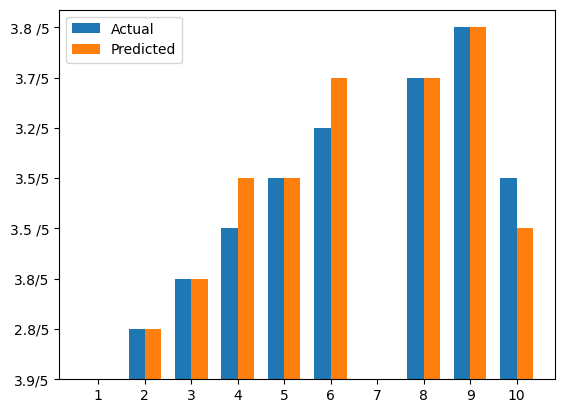

In [28]:
# Get the predicted and actual values for the first 10 instances in the test set
predicted = pipeline.predict(X_test[:10])
actual = y_test[:10]

# Create a list of dictionaries with the predicted and actual values for each instance
data = [{'Instance': i+1, 'Predicted': predicted[i], 'Actual': actual.iloc[i]} for i in range(10)]

# Create a Pandas DataFrame from the list of dictionaries
df = pd.DataFrame(data)


# Create a bar chart of the predicted and actual values
x = np.arange(len(df))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df['Actual'], width, label='Actual')
rects2 = ax.bar(x + width/2, df['Predicted'], width, label='Predicted')
ax.set_xticks(x)
ax.set_xticklabels(df['Instance'])
ax.legend()
plt.show()



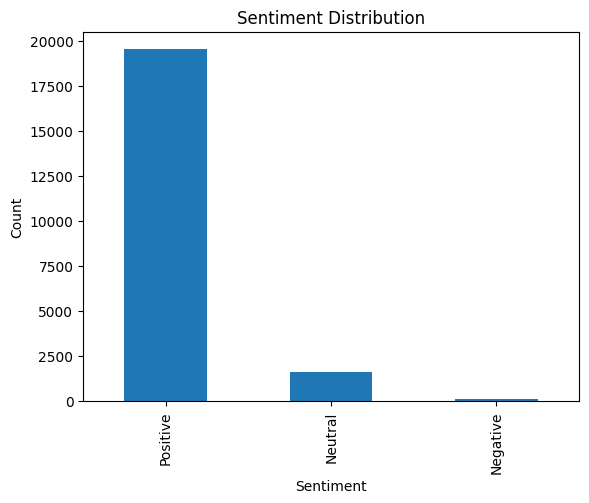

              precision    recall  f1-score   support

    Negative       1.00      0.76      0.86        42
     Neutral       0.93      0.66      0.77       460
    Positive       0.97      1.00      0.98      5885

    accuracy                           0.97      6387
   macro avg       0.97      0.81      0.87      6387
weighted avg       0.97      0.97      0.97      6387



In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import re

# Load the Zomato dataset
df = pd.read_csv("zomato.csv")

# Keep only the relevant columns
df = df[["reviews_list", "rate"]]

# Remove rows with missing values
df = df.dropna()

# Filter out non-numeric values from the "rate" column
df = df[df["rate"].apply(lambda x: bool(re.match(r"^\d+(\.\d+)?/\d+$", str(x))))]

# Convert the "rate" column to a float type
df["rate"] = df["rate"].apply(lambda x: float(x.split("/")[0]))

# Map the "rate" column to sentiment categories
df["sentiment"] = pd.cut(df["rate"], bins=[-np.inf, 2.5, 3, np.inf], labels=["Negative", "Neutral", "Positive"])

# Plot the sentiment distribution
df["sentiment"].value_counts().plot(kind="bar")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["reviews_list"], df["sentiment"], test_size=0.3)

# Convert the reviews into TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words="english")
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train a linear SVM classifier on the training data
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing data
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


In [30]:

import pandas as pd

# Load the Zomato dataset
data = pd.read_csv('zomato.csv')

def recommend_restaurant(cuisine, cost):
    # Filter restaurants based on user's cuisine choice
    cuisine_restaurants = data[data['cuisines'].str.contains(cuisine, case=False, na=False)].copy()

    if cuisine_restaurants.empty:
        return "No restaurants found for the given cuisine."

    # Convert "approx_cost(for two people)" column to numeric
    cuisine_restaurants.loc[:, 'approx_cost(for two people)'] = cuisine_restaurants['approx_cost(for two people)'].str.replace(',', '')
    cuisine_restaurants.loc[:, 'approx_cost(for two people)'] = pd.to_numeric(cuisine_restaurants['approx_cost(for two people)'], errors='coerce')

    # Filter restaurants based on average cost for two people
    cost_restaurants = cuisine_restaurants[cuisine_restaurants['approx_cost(for two people)'] <= cost]

    if cost_restaurants.empty:
        return "No restaurants found within the given budget."

    # Sort restaurants by approximate cost for two people in ascending order
    sorted_restaurants = cost_restaurants.sort_values('approx_cost(for two people)')

    # Get the name of the recommended restaurant
    recommended_restaurant = sorted_restaurants.iloc[0]['name']
    return recommended_restaurant

# Get user input for cuisine preference
user_cuisine = input("Enter your cuisine preference: ")

# Get user input for average cost for two people
user_cost = float(input("Enter your budget for two people: "))

# Call the recommend_restaurant function with user's inputs
recommendation = recommend_restaurant(user_cuisine, user_cost)

# Display the recommended restaurant
print("Recommended Restaurant:", recommendation)


Enter your cuisine preference: north
Enter your budget for two people: 1111
Recommended Restaurant: Srinidhi Sagar Deluxe
